# Feature Weights

### Preamble

In [1]:
SYS_PATH = r'C:/Users/mark/Documents/GitHub/honours/dev/package/'
SAVE_PATH = r"C:/Users/mark/Documents/GitHub/honours/submissions/thesis-original"
LOAD_PATH = r"C:/Users/mark/Documents/GitHub/honours/dev/package/analysis/output/temp/output.db"

In [2]:
#standard imports
import sys
import numpy as np
import scipy.stats as stats
import pandas as pd
from datetime import date, timedelta
import math
from itertools import chain

#third party imports
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as tkr
import seaborn as sns
from sklearn import metrics

In [3]:
import importlib
import sys; sys.path.append(SYS_PATH)
import analysis.helper as helper
importlib.reload(helper)
%matplotlib inline

In [4]:
TINY_SIZE, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE  = 12, 16, 18, 30
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_palette("colorblind")
rcParams['font.family'] = 'serif' 
rcParams['font.serif'] = 'CMU Serif' 
rcParams['font.weight'] = 'bold'
rcParams['font.size'] = SMALL_SIZE #default font size
rcParams['axes.titlesize'] =SMALL_SIZE   # fontsize of the axes title
rcParams['axes.labelsize'] =MEDIUM_SIZE    # fontsize of the x and y labels
rcParams['xtick.labelsize'] =SMALL_SIZE    # fontsize of the tick labels
rcParams['ytick.labelsize'] =SMALL_SIZE   # fontsize of the tick labels
rcParams['legend.fontsize'] =SMALL_SIZE    # legend fontsize
rcParams['figure.titlesize'] =BIGGER_SIZE  # fontsize of the figure title
rcParams['figure.figsize'] = (8,3)
pd.set_option('precision',3)
outline_bars = dict(linewidth = 1.25, edgecolor = '.15')

### Feature weights by slice date

In [25]:
reload = False

In [26]:
chart_id = "figures/evaluation/features_slice"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [27]:
def get_data():
    data = helper.get_results(33, "evaluate")
    data = data[["feature_names", "Weights", "forecast_window_years","feature_date_str"]]
    data = data.loc[data["forecast_window_years"] == "2 Years"].reset_index(drop=True)
    data = helper.get_feature_values(data, total="feature_names")
    data["Weights"] = data["Weights"].astype(float)
    data["feature_groups"] = data["feature_names"].apply(lambda x: x.split("_")[2])
    return data

In [28]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    data.to_pickle(pickle_path)

Error: Time
Error: Imputer
Error: Transformer
Error: Scaler
Error: Extractor


In [38]:
yo = data.groupby(["feature_date_str", "feature_groups"]).agg({"Weights":sum})
yoo = yo.groupby(level=0, group_keys=False)
yooo = yoo.apply(lambda x: helper.divide_groups(x, yoo.sum()))
yooo = yooo.groupby(level=0, group_keys=False)
weights = yooo.apply(lambda x: x.sort_values(by="Weights",ascending=False))["Weights"]
if type(weights) is pd.Series: weights = weights.to_frame()
weights = weights.reset_index(drop=False)

In [39]:
x = "feature_groups"
y = "Weights"
hue = "feature_date_str"
order = weights.groupby(x)[y].mean().index.sort_values(ascending=True).tolist()

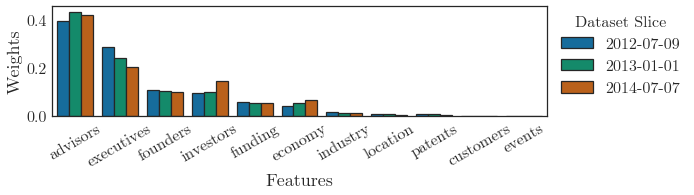

In [45]:
f = plt.figure()
ax = sns.barplot(data=weights, x=x,y=y, hue = hue, ci=None, **outline_bars)
ax.set_xlabel("Features")
ax.set_ylabel("Weights")
ax.ticklabel_format(style="sci",scilimits=(-2,5),axis='y')
plt.xticks(rotation=30)
plt.legend(title="Dataset Slice",bbox_to_anchor=(1,1.05), loc='upper left')
plt.tight_layout()

In [46]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Feature weights by forecast window

In [47]:
reload = False

In [48]:
chart_id = "figures/evaluation/features_window"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [49]:
def get_data():
    data = helper.get_results(33, "evaluate")
    data = data[["feature_names", "Weights", "forecast_window_years","feature_date_str"]]
    data = helper.get_feature_values(data, total="feature_names")
    data["Weights"] = data["Weights"].astype(float)
    data["feature_groups"] = data["feature_names"].apply(lambda x: x.split("_")[2])
    return data

In [50]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    data.to_pickle(pickle_path)

Error: Time
Error: Imputer
Error: Transformer
Error: Scaler
Error: Extractor


In [51]:
yo = data.groupby(["forecast_window_years","feature_groups"]).agg({"Weights":sum})
yoo = yo.groupby(level=0, group_keys=False)
yooo = yoo.apply(lambda x: helper.divide_groups(x, yoo.sum()))
yooo = yooo.groupby(level=0, group_keys=False)
weights = yooo.apply(lambda x: x.sort_values(by="Weights",ascending=False))["Weights"]
if type(weights) is pd.Series: weights = weights.to_frame()
weights = weights.reset_index(drop=False)

In [52]:
x = "feature_groups"
y = "Weights"
hue = "forecast_window_years"
order = weights.groupby(x)[y].mean().index.sort_values(ascending=True).tolist()

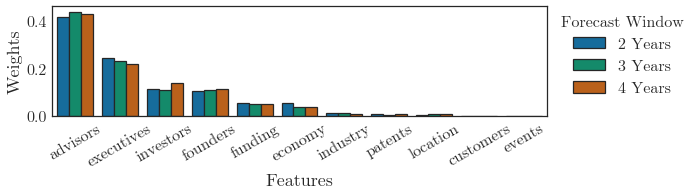

In [54]:
f = plt.figure()
ax = sns.barplot(data=weights, x=x,y=y,hue=hue, **outline_bars)
ax.set_xlabel("Features")
ax.set_ylabel("Weights")
ax.ticklabel_format(style="sci",scilimits=(-2,5),axis='y')
plt.xticks(rotation=30)
plt.legend(title="Forecast Window",bbox_to_anchor=(1,1.05), loc='upper left')
plt.tight_layout()

In [55]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Feature weights by developmental stage

In [56]:
reload = False

In [57]:
chart_id = "figures/evaluation/features_stage"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [58]:
def get_data():
    data = helper.get_results(34, "evaluate")
    data["feature_stage_single"] = data["feature_stage"].apply(lambda x: x.value_counts().index[0])
    data = data[["feature_names", "Weights", "forecast_window_years","feature_date_str","feature_stage_single"]]
    data = helper.get_feature_values(data, total="feature_names")
    data["Weights"] = data["Weights"].astype(float)
    data["feature_groups"] = data["feature_names"].apply(lambda x: x.split("_")[2])
    return data

In [59]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    data.to_pickle(pickle_path)

Error: Time
Error: Imputer
Error: Transformer
Error: Scaler
Error: Extractor


In [60]:
yo = data.groupby(["feature_stage_single","feature_groups"]).agg({"Weights":sum})
yoo = yo.groupby(level=0, group_keys=False)
yooo = yoo.apply(lambda x: helper.divide_groups(x, yoo.sum()))
yooo = yooo.groupby(level=0, group_keys=False)
weights = yooo.apply(lambda x: x.sort_values(by="Weights",ascending=False))["Weights"]
if type(weights) is pd.Series: weights = weights.to_frame()
weights = weights.reset_index(drop=False)

In [61]:
x = "feature_groups"
y = "Weights"
hue = "feature_stage_single"
order = weights.groupby(x)[y].mean().sort_values(ascending=False).index.tolist()

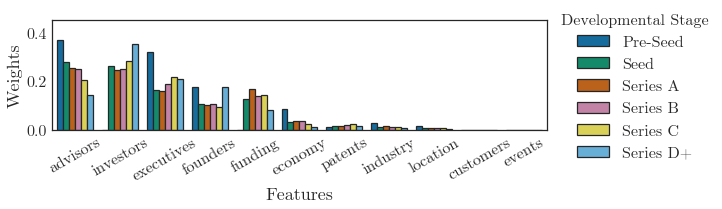

In [64]:
f = plt.figure()
ax = sns.barplot(data=weights, x=x,y=y,hue=hue, order=order, **outline_bars)
ax.set_xlabel("Features")
ax.set_ylabel("Weights")
ax.ticklabel_format(style="sci",scilimits=(-2,5),axis='y')
plt.ylim(ymin=0, ymax=0.45)
plt.xticks(rotation=30)
plt.legend(title="Developmental Stage", bbox_to_anchor=(1,1.2))
plt.tight_layout()

In [65]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Feature weights by target outcome

In [66]:
reload = False

In [67]:
chart_id = "figures/evaluation/features_outcome"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [68]:
def get_data():
    data = helper.get_results(35, "evaluate")
    data["label_type"] = data["label_type"].apply(lambda x: x.replace("_"," "))
    data = data[["feature_names", "Weights", "forecast_window_years","feature_date_str","label_type"]]
    data = helper.get_feature_values(data, total="feature_names")
    data["Weights"] = data["Weights"].astype(float)
    data["feature_groups"] = data["feature_names"].apply(lambda x: x.split("_")[2])
    return data

In [69]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    data.to_pickle(pickle_path)

Error: Time
Error: Imputer
Error: Transformer
Error: Scaler
Error: Extractor


In [70]:
yo = data.groupby(["label_type","feature_groups"]).agg({"Weights":sum})
yoo = yo.groupby(level=0, group_keys=False)
yooo = yoo.apply(lambda x: helper.divide_groups(x, yoo.sum()))
yooo = yooo.groupby(level=0, group_keys=False)
weights = yooo.apply(lambda x: x.sort_values(by="Weights",ascending=False))["Weights"]
if type(weights) is pd.Series: weights = weights.to_frame()
weights = weights.reset_index(drop=False)

In [71]:
x = "feature_groups"
y = "Weights"
hue = "label_type"
order = weights.groupby(x)[y].mean().sort_values(ascending=False).index.tolist()
hue_order = ["Extra Stage", "Extra Round", "Exit", "Acquisition", "IPO"]

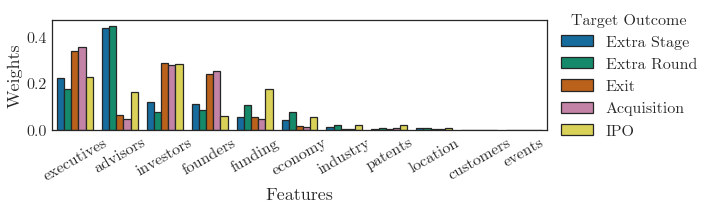

In [72]:
f = plt.figure()
ax = sns.barplot(data=weights, x=x,y=y,hue=hue, order=order,hue_order=hue_order, **outline_bars)
ax.set_xlabel("Features")
ax.set_ylabel("Weights")
ax.ticklabel_format(style="sci",scilimits=(-2,5),axis='y')
plt.xticks(rotation=30)
plt.legend(title="Target Outcome", bbox_to_anchor=(1,1.2))
plt.tight_layout()

In [73]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")